## Predicting Traffic Volume on Interstate Roads



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [10]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [11]:
# Convert datetime and extract hour
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].dt.hour

# Encode holiday: change 'None' to 0, all others to 1
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if x == 'None' else 1)

# Select features and target
X = data[['hour', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'is_holiday']]
y = data['traffic_volume']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 3396384.0988558237
R² Score: 0.1409200833385036


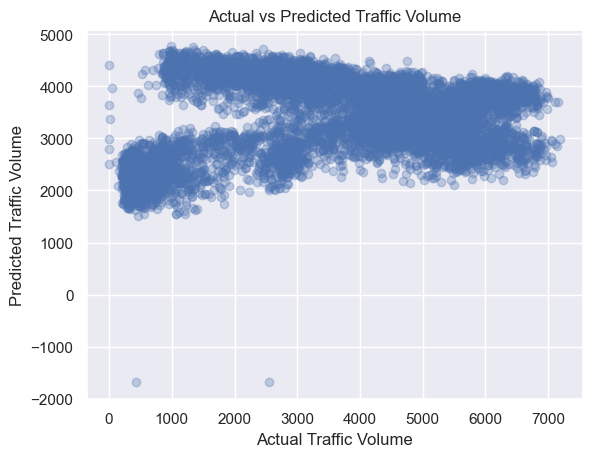

In [16]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume")
plt.show()


## R-Squared

In [17]:
model.score(X_train, y_train)

0.13466686540273876

## Coefficients

In [19]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
model.coef_

array([ 9.61686776e+01,  1.48778243e+01,  1.13767547e-01, -4.61298924e+02,
        2.98967726e+00,  0.00000000e+00])

In [21]:
data.columns


Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour',
       'is_holiday'],
      dtype='object')

## Intercept

In [22]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
model.intercept_

-2170.4430574421954

## Making Predictions

In [24]:
# There is a dedicated method should we want to predict values
# Values in correct order: [temp, rain_1h, snow_1h, clouds_all, hour, is_holiday]
prediction = model.predict(np.array([[275.0, 0.0, 0.0, 90, 17, 0]]))  # Reshape as a 2D array
print(prediction)

[-17190.13537665]


C:\Users\Sober\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# Create your new data
new_data = pd.DataFrame([
    {'temp': 280.5, 'rain_1h': 0.0, 'snow_1h': 0.0, 'clouds_all': 75, 'hour': 8,  'is_holiday': 0},
    {'temp': 283.2, 'rain_1h': 0.2, 'snow_1h': 0.0, 'clouds_all': 20, 'hour': 17, 'is_holiday': 0}
])

# Reorder columns to match the order used in model training
ordered_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'is_holiday']
new_data = new_data[ordered_columns]

# Predict
predictions = np.clip(model.predict(new_data.values), 0, None)
print(predictions)




[    0.         15892.34803222]


C:\Users\Sober\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# Predict traffic volume on the test data
y_test_pred = model.predict(X_test)


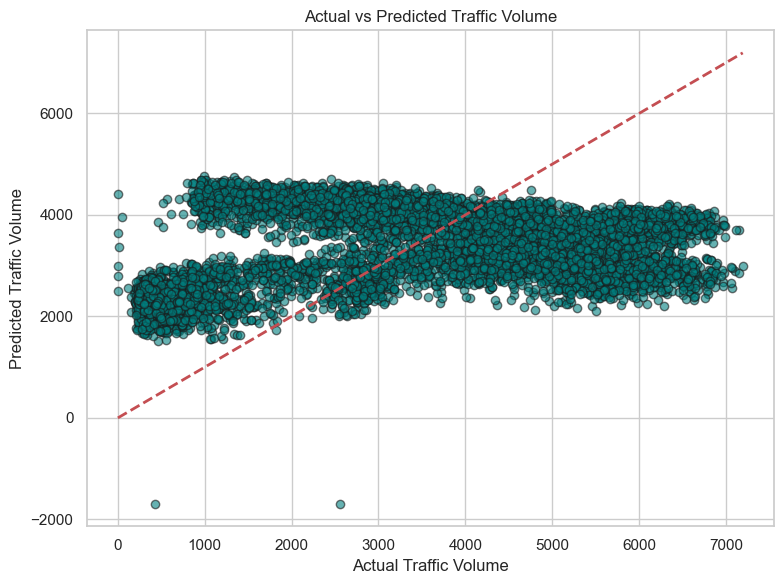

In [32]:
# Create scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ideal line
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.tight_layout()
plt.show()
